<a href="https://colab.research.google.com/github/SJa-638/test-robot/blob/main/Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **To Download the needed Libaries Exceute the following Commands**

In [ ]:
!pip install -q keras

In [ ]:
!pip install kaggle

In [ ]:
!pip install opencv-python

In [ ]:
!apt install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [ ]:
!pip install tensorflow

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
!pip install pytorch

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
ERROR: Could not build wheels for pytorch, which is required to install pyproject.toml-based projects


In [ ]:
!pip install opencv-python pillow tensorflow

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2023-10-30 19:35:39--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  71.1MB/s    in 3.6s    

2023-10-30 19:35:43 (65.2 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

--2023-10-30 19:35:43--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2023-10-30 19:35:43 (115 MB/s) - ‘yolov3.cfg’ saved [8342/8342]



In [ ]:
!ls

cardboard	  glass  paper	    plastic  yolov3.cfg
garbage_model.h5  metal  photo.jpg  trash    yolov3.weights


## **Connecting to The Google drive to get The dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


[Garabage Clssification Dataset](https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification/data)

## Loading Libraries

In [ ]:
import cv2
import numpy as np
#On importing functions from library Tensorflow it is better to write it in the code itself not import it and use it then
import tensorflow as tf # We use tf alias on using tensorflow library
import random
import os
#from kaggle.api.kaggle_api_extended import KaggleApi
import random
import shutil
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import torch
import torchvision
import cv2
from pycocotools.coco import COCO
from IPython.display import Image
from PIL import Image
import requests
#from yolov5.models.common import DetectMultiBackend
#from yolov5.utils.datasets import LoadImagesAndLabels
#from yolov5.utils.general import coco80_to_coco91_class


## Tensorflow
[TensorFlow For Beginners](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb)
*VERY IMP NOTE ON DOWNLOADING TENSORFLOW ON YOUR LOCAL COMPUTER BE CAREFUL ABOUT USING PIP TO INSTALL IT AND MAKE SURE VERSIONS OF PYTHON TENSORFLOW AND PIP ARE RIGHT OTHERWISE IT WON'T BE RECOGNIZED BY THE COMPUTER / OR DOWNLOAD IT MANUALLY FOLLOWING A TUTORIAL/ OR USE IT ON GOOGLE COLAB IT MAINTAINS THESE ERRORS*
1. **Collect a dataset of images of garbage, labeled with the type of garbage.** You can either collect this dataset yourself or use a pre-existing dataset. Some pre-existing datasets that you can use include:
    - TrashNet
    - RecycleNet
    - Google AI CircularNet dataset
2. **Split the dataset into training and test sets.** The training set will be used to train the model, and the test set will be used to evaluate the performance of the model on unseen data. A common split is to use 80% of the dataset for training and 20% of the dataset for testing.
3. **Preprocess the images.** This may involve resizing the images to a consistent size, normalizing the pixel values, and/or cropping the images to focus on the garbage item.
4. **Choose a model architecture.** There are a number of different TensorFlow model architectures that you can use for garbage classification. Some popular choices include:
    - ResNet
    - MobileNet
    - EfficientNet
    - VGG16
5. **Compile the model.** This involves specifying the loss function, optimizer, and learning rate.
6. **Train the model.** This involves feeding the training images to the model and updating the model parameters to minimize the loss function.
7. **Evaluate the model.** This involves feeding the test images to the model and measuring the accuracy of the model's predictions.
8. **Save the model.** Once you are satisfied with the performance of the model, you can save it to a file. This will allow you to load the model later and use it to classify new images of garbage.

## Tutorial For tensorflow

*   [TensorFlow](https://www.youtube.com/watch?v=CMu25mtyl-s)
*   [Train Neural Network](https://www.youtube.com/watch?v=uqomO_BZ44g)




Yolo

In [ ]:
dataset = '/content/drive/MyDrive/dataset/Garbage_classification/Garbage_classification'
# Load the pre-trained YOLOv3 weights and configuration
yolo_weights = 'yolov3.weights'
yolo_config = 'yolov3.cfg'
yolo_classes = '/content/drive/MyDrive/yolov3.txt' #Upload the file on Github please

# Load the class labels
with open(yolo_classes, 'r') as f:
    class_names = f.read().splitlines()

    # Load the YOLO model
net = cv2.dnn.readNetFromDarknet(yolo_config, yolo_weights)

# Set backend and target to use GPU
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)

# Set the input image size
input_size = (416, 416)

# Get the list of all images in the Kaggle database
image_paths = []
for root, dirs, files in os.walk('/content/drive/MyDrive/dataset/Garbage_classification/Garbage_classification'):
    for file in files:
        if file.endswith('.jpg'):
            image_paths.append(os.path.join(root, file))

# Iterate over all the images in the database
for image_path in image_paths:

    # Load and preprocess the image
    image = cv2.imread(image_path)
    blob = cv2.dnn.blobFromImage(image, 1/255.0, input_size, swapRB=True, crop=False)
# Set the input blob for the network
net.setInput(blob)

# Forward pass through the network
layer_names = net.getLayerNames()
unconnected_out_layer_index = net.getUnconnectedOutLayers()

if isinstance(unconnected_out_layer_index, int):
    output_layers = layer_names[unconnected_out_layer_index]
else:
    output_layers = [layer_names[i - 1] for i in unconnected_out_layer_index]

outputs = net.forward(output_layers)


# Process the outputs
class_ids = []
confidences = []
boxes = []

for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.5:
            center_x = int(detection[0] * image.shape[1])
            center_y = int(detection[1] * image.shape[0])
            width = int(detection[2] * image.shape[1])
            height = int(detection[3] * image.shape[0])


            # Calculate the top-left corner coordinates of the bounding box
            x = int(center_x - width / 2)
            y = int(center_y - height / 2)

            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, width, height])

# Apply non-maximum suppression to remove redundant overlapping boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.5, nms_threshold=0.4)

# Draw the bounding boxes and labels on the image
for i in indices:
    i = i[0]
    x, y, width, height = boxes[i]
    class_id = class_ids[i]
    class_name = class_names[class_id]
    confidence = confidences[i]


    # Draw bounding box
    cv2.rectangle(image, (x, y), (x+width, y+height), (0, 255, 0), 2)

    # Draw label and confidence
    label = f'{class_name}: {confidence:.2f}'
    cv2.putText(image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


# Training the model using TensorFlow

In [ ]:
import tensorflow_datasets as tds

# Defining batch size and image labels

batch_size = 64
dataset_name = dataset
class_names = dataset.class_names
print(class_names)

AttributeError: ignored

In [ ]:
# Load the pre-trained MobileNetV2 model
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(224, 224, 3), weights='imagenet')

# Reshape the output of the base model to 4D
base_model_output = tf.reshape(base_model.output, [-1, 1, 1, 1000])

# Create a data loader for the training and validation data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset/Garbage_classification/Garbage_classification/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/dataset/Garbage_classification/Garbage_classification/',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Add a global average pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(base_model_output)

# Add a dense layer with 6 outputs, corresponding to the 6 garbage classes
x = tf.keras.layers.Dense(6, activation='sigmoid')(x)

# Create the model
model = tf.keras.Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=30)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_generator)

# Save the model
model.save('garbage_model.h5')

# Load the trained TensorFlow model
model = tf.keras.models.load_model('garbage_model.h5')


# Print the validation accuracy
print('Validation accuracy:', val_accuracy)

Found 2527 images belonging to 6 classes.
Found 2527 images belonging to 6 classes.
Epoch 1/30
79/79 [==============================] - 34s 149ms/step - loss: 0.6541 - accuracy: 0.5026
Epoch 2/30
79/79 [==============================] - 12s 145ms/step - loss: 0.6004 - accuracy: 0.4424
Epoch 3/30
79/79 [==============================] - 12s 148ms/step - loss: 0.5611 - accuracy: 0.3463
Epoch 4/30
79/79 [==============================] - 12s 145ms/step - loss: 0.5314 - accuracy: 0.2837
Epoch 5/30
79/79 [==============================] - 11s 141ms/step - loss: 0.5088 - accuracy: 0.2897
Epoch 6/30
79/79 [==============================] - 14s 171ms/step - loss: 0.4906 - accuracy: 0.3399
Epoch 7/30
79/79 [==============================] - 12s 147ms/step - loss: 0.4763 - accuracy: 0.3178
Epoch 8/30
79/79 [==============================] - 12s 147ms/step - loss: 0.4683 - accuracy: 0.3008
Epoch 9/30
79/79 [==============================] - 11s 143ms/step - loss: 0.4563 - accuracy: 0.3261
Epoch 1

## **Capturing image from webcam to be classified to the By the trained model**


---

# Code that is taken from google coolab as we are working on cloud not local computer


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


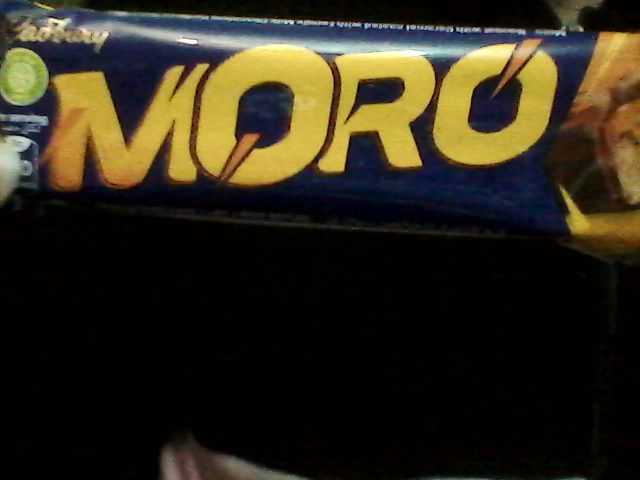

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json


cp: cannot stat '/content/kaggle.json': No such file or directory


In [ ]:
!sudo chown root:root ~/.kaggle
!sudo chown root:root ~/.kaggle/kaggle.json

In [ ]:
!sudo chmod 600 ~/.kaggle
!sudo chmod 600 ~/.kaggle/kaggle.json

## Upload to Github


---



In [ ]:
!git clone https://github.com/SJa-638/test-robot.git

In [ ]:
!git clone https://github.com/SJa-638/test-robot.git

In [ ]:
!git config --global user.name "SJa-638"
!git config --global user.email "sazab638@gmail.com"


# Navigate to the cloned repository directory
%cd '/content/test-robot'

# Upload the notebook to the cloned repository
!git add .
!git commit -m "Add notebook"

# Push the changes to the remote repository
!git push

# **Draft**


---




In [ ]:
import kaggle
#Set up the Kaggle API
api = KaggleApi()
api.authenticate()

#Path to the downloaded dataset
dataset_path = 'D:\Kaggle dataset archive.zip'  # Path to the extracted dataset files

#Download the Kaggle dataset
dataset_name = 'lkihjh777'  # Replace with the name of the Kaggle dataset you want to download
#api.dataset_download_files(dataset_name, path=dataset_path, unzip=True)

#Iterate over the downloaded images
for file_name in os.listdir(dataset_path):
    image_path = os.path.join(dataset_path, file_name)

    # Load the image using OpenCV
    image = cv2.imread(image_path)

    # Perform image processing operations on the image as needed
    # Example: Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Example: Apply a threshold to create a binary image
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

    # Perform further processing or analysis on the image

    # Display the processed image
    cv2.imshow('Processed Image', binary_image)
    cv2.waitKey(0)

    # Clean up resources
    cv2.destroyAllWindows()

In [ ]:
# Capture an image from the webcam
#cap = cv2.VideoCapture(0)
#ret, frame = cap.read()


In [ ]:
# Preprocess the image
#image = cv2.resize(frame, (224, 224))
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#image = np.expand_dims(image, axis=0)

# Classify the image using the trained model
prediction = model.predict('photo.jpg')
predicted_class = np.argmax(prediction)

# Print the predicted class
print("Predicted class:", predicted_class)

# Release the webcam
cap.release()

In [ ]:
   '''
def take_photo():
  """Takes a photo using the webcam and saves it to a file.

  Returns:
    The filename of the saved photo.
  """

  cap = cv2.VideoCapture(0)
  ret, frame = cap.read()
  if ret:
    filename = 'photo.jpg'
    cv2.imwrite(filename, frame)
    return filename
  else:
    raise Exception('Could not take photo.')
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))
  '''

In [ ]:
# Create a virtual webcam using ManyCam.
url = 'https://api.manycam.com/v1/webcams'
response = requests.post(url, json={'name': 'Virtual Webcam'})
webcam_id = response.json()['id']

# Capture a frame from the virtual webcam.
cap = cv2.VideoCapture(webcam_id)
ret, frame = cap.read()

# Save the frame to a file.
filename = 'photo.jpg'
cv2.imwrite(filename, frame)

# Display the image.
image = cv2.imread(filename)
cv2.imshow('Image', image)
cv2.waitKey(0)

In [ ]:
# Modify the path to the path of dataset in your own Drive
dataset = '/content/drive/MyDrive/dataset/Garbage_classification/Garbage_classification'
trainGarabge = '/content/drive/MyDrive/dataset/Garbage_classification/Garbage_classification'
valdData = '/content/drive/MyDrive/dataset/Garbage_classification/Garbage_classification'

# Navigate to the directory where the dataset is uploaded
os.chdir(trainGarabge)
os.chdir(valdData)

dataset = tf.keras.preprocessing.image_dataset_from_directory(dataset)
# Load the dataset into Keras
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    trainGarabge,
    seed=123,
    validation_split=0.2,
    subset="training",
)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    valdData,
    validation_split=0.2,
    subset="validation",
    seed=123,
)

===================================================================
size = (512,512)
#TO be Rewritten
ds_train = trainGarabge.map(lambda image, label: (tf.image.resize(image, size), label))
#ds_train = trainGarabge.map(lambda image, label:(tf.image.resize(image,size),label)
ds_vald = valdData.map(lambda image, label:( tf.image.resize(image,size),label ))


In [ ]:
# Create the model
model = tf.keras.Sequential()


# Add convolutional layers
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(tf.keras.layers.Flatten())

# Add dense layers
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='softmax'))


# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

